# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable


In [1]:
# Libraries Import
import zipfile
import pandas as pd
import os
import requests
from io import StringIO
#import seaborn as sns
import matplotlib.pyplot as plt


## 1. Gather data

### **1.1.** Problem Statement

Two data sets were chosen:
*    *Breast Cancer Wisconsin (Diagnostic) Dataset*
*    *Wine Quality Dataset (Red Wine)*

**Breast Cancer Wisconsin (Diagnostic) Dataset Intro:**

*To utilize the Breast Cancer Wisconsin (Diagnostic) Dataset to build a predictive model that classifies breast tumors as either malignant or benign based on features such as tumor radius, texture, perimeter, area, and other metrics. The objective is to develop a robust machine learning algorithm capable of accurately diagnosing breast cancer at an early stage, thereby 
facilitating timely medical intervention and improving patient outcomes.*
###### Problem Statement:
*How do the key features of breast tumors differ between malignant and benign cases based on the Breast Cancer Wisconsin (Diagnostic) Dataset?*





**Wine Quality Dataset Intro:**

*To analyze chemical factors influencing red wine quality using the Wine Quality Dataset. Leveraging web scraping and Pandas for data extraction and manipulation, the goal is to build a predictive model that accurately assesses wine quality based on key attributes such as acidity levels, residual sugar, sulfur dioxide content, density, pH, sulphates, alcohol percentage, and sensory quality scores.*

### **1.2.** Gather at least two datasets using two different data gathering methods



#### Breast Cancer Wisconsin (Diagnostic) Dataset
The Breast Cancer Wisconsin (Diagnostic) Dataset is chosen for its relevance to breast cancer research. It provides data on various features derived from digitized images of breast tissue, which can aid in early detection and non-metastatic diagnosis.

Why chose Breast Cancer Diagnostic Dataset and method: *I chose this Dataset due to its clinical relevance in addressing global breast cancer concerns and its suitability for applying machine learning techniques in diagnostic and predictive modeling. I chose manual extraction via Python to maintain control over data preprocessing*

Rows and Columns: *It contains 569 rows upon 33 columns*

Type: *CSV file* 

Method: *Download data manually*

Dataset variables:

*    *id: Identifier for each sample.*
*    *diagnosis: Diagnosis of the sample, either 'M' (malignant) or 'B' (benign).*
*    *radius_mean: Mean of distances from center to points on the perimeter.*
*    *texture_mean: Standard deviation of gray-scale values.*
*    *perimeter_mean: Mean size of the core tumor.*
*    *area_mean: Area of the tumor.*
*    *smoothness_mean: Local variation in radius lengths.*
*    *compactness_mean: Perimeter^2 / area - 1.0.*
*    *concavity_mean: Severity of concave portions of the contour.*
*    *concave points_mean: Number of concave portions of the contour.*
*    *symmetry_mean: Symmetry of the tumor.*
*    *fractal_dimension_mean: "Coastline approximation" - 1.*
*    *radius_se: Standard error of the mean of distances from center to points on the perimeter.*
*    *texture_se: Standard error of gray-scale values.
*    *perimeter_se: Standard error of the core tumor size.*
*    *area_se: Standard error of the tumor area.*
*    *smoothness_se: Standard error of local variation in radius lengths.*
*    *compactness_se: Standard error of perimeter^2 / area - 1.0.*
*    *concavity_se: Standard error of severity of concave portions of the contour.*
*    *concave points_se: Standard error for number of concave portions of the contour.*
*    *symmetry_se: Standard error for symmetry of the tumor.*
*    *fractal_dimension_se: Standard error for "coastline approximation" - 1.*
*    *radius_worst: "Worst" or largest mean value of distances from center to points on the perimeter.*
*    *texture_worst: "Worst" or largest standard deviation of gray-scale values.*
*    *perimeter_worst: "Worst" or largest perimeter of the core tumor.*
*    *area_worst: "Worst" or largest area of the tumor.*
*    *smoothness_worst: "Worst" or largest local variation in radius lengths.*
*    *compactness_worst: "Worst" or largest perimeter^2 / area - 1.0.*
*    *concavity_worst: "Worst" or largest severity of concave portions of the contour.*
*    *concave points_worst: "Worst" or largest number of concave portions of the contour.*
*    *symmetry_worst: "Worst" or largest symmetry of the tumor.*
*    *fractal_dimension_worst: "Worst" or largest "coastline approximation" - 1.*
*    *Unnamed: 32: This column appears to be unnamed and may require further investigation or may not be relevant to the dataset.*

In [2]:
# Load CSV data into Pandas DataFrame
df = pd.read_csv('data.csv')

# Process the data
df.head()

,I_D,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,perimeter_area_mean
0,842302,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,122.8-1001.0
1,842517,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,132.9-1326.0
2,84300903,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,130.0-1203.0
3,84348301,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,77.58-386.1
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,135.1-1297.0


#### Wine Quality Dataset (Red Wine)
The dataset is hosted on the UCI Machine Learning Repository and focuses on red wine characteristics.

Type: *Web-based Extraction* (CSV File.)

Method: *CSV data directly from the URL*

Why Choose the Wine Quality Dataset and Method: *The Wine Quality Dataset was chosen for its relevance to understanding key chemical factors affecting red wine quality, facilitating insights into production and consumer preferences. Using web scraping and Pandas DataFrame allows for efficient extraction and analysis of data, supporting thorough exploration and predictive modeling tasks with real-time updates and flexible data manipulation capabilities.*

Rows and Columns: *The dataset was originally composed of 1599 rows and 12 columns, but for faster processing, it was limited to 501 rows.*

Dataset variables:

*    *Fixed acidity: Fixed acidity is a measure of non-volatile acids in wine, and it's an important factor in wine taste.*

*    *Volatile acidity: Volatile acidity refers to the presence of acetic acid in wine, which can lead to an unpleasant vinegar taste.*

*    *Citric acid: Citric acid is often added to wines to give them a fresh flavor.*

*    *Residual sugar: Residual sugar refers to the amount of sugar remaining after fermentation stops.*

*    *Chlorides: Chlorides are a measure of the salt content in the wine.*

*    *Free sulfur dioxide: Free sulfur dioxide prevents microbial growth and oxidation in wine.*

*    *Total sulfur dioxide: Total sulfur dioxide is the total amount of sulfur dioxide in the wine.*

*    *Density: Density is the mass per unit volume of the wine.*

*   *pH: pH is a measure of acidity or basicity in wine.*

*    *Sulphates: Sulphates contribute to sulfur dioxide levels in wine and can act as an antimicrobial and antioxidant agent.*

*    *Alcohol: Alcohol percentage in the wine.*

*    *Quality (score between 0 and 10): The quality score is based on sensory data, and it is the target variable in regression tasks.*

In [3]:
def load_csv_to_dataframe(url, nrows=None):
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Read the content of the response into a pandas DataFrame, limiting rows if specified
        if nrows:
            csv_content = StringIO(response.text)
            df = pd.read_csv(csv_content, sep=';', nrows=nrows)
        else:
            df = pd.read_csv(StringIO(response.text), sep=';')
        
        return df
    else:
        print(f"Failed to retrieve data from {url}. Status code: {response.status_code}")
        return None

# Example usage:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = load_csv_to_dataframe(url, nrows=501)  # Limiting to 100 rows for demonstration

# Display the first few rows of the DataFrame
wine_data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

#### Column called "Unnamed"

In [8]:
#FILL IN - Inspecting the dataframe visually

# Analyze Unnamed: 32 column
column_to_analyze = 'Unnamed: 32'
# Check if the column exists and contains numeric data
if column_to_analyze in df.columns and pd.api.types.is_numeric_dtype(df[column_to_analyze]):
    # Create a mask to filter out NaN values for plotting
    mask = ~df[column_to_analyze].isna()

    # Check if there is any data to plot after filtering NaN values
    if mask.any():
        # Create the histogram using Matplotlib
        plt.figure(figsize=(8, 6))
        plt.hist(df[column_to_analyze][mask], bins=20, edgecolor='black', alpha=0.7)
        plt.title(f"Distribution of {column_to_analyze}")
        plt.xlabel(column_to_analyze)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
    else:
        print(f"No valid data to plot for column '{column_to_analyze}'.")
else:
    print(f"Column '{column_to_analyze}' does not contain numeric data.")

No valid data to plot for column 'Unnamed: 32' after considering NaN values.


The Histogram shows no data in that column.

In [6]:
#FILL IN - Inspecting the dataframe programmatically
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   I_D                      569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    object 
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

Issue and justification: *Column "Unnamed: 32" points to missing or unclear metadata as it isnt filled with any data. This should be addressed by either assigning a proper name to the column or removing it if it is irrelevant to the dataset. In our case, since their is no data in it, the column will be removed in further cleaning step.*

### Quality Issue 2:

### Inconsistencies in Value Formatting in ''symmetry_mean''

In [9]:
#FILL IN - Inspecting the dataframe visually
#Show row 5 of dataset
row_five = df.iloc[5]
row_five_df = pd.DataFrame(row_five).transpose()  # Transpose to display as a row
print("Row 5 of the DataFrame:")
row_five_df


Row 5 of the DataFrame:


,I_D,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,perimeter_area_mean
5,843786,M,12.45,15.7,0.1278,0.17,0.1578,0.08089,one,0.07613,...,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,NaN,82.57-477.1


In [10]:
#FILL IN - Inspecting the dataframe programmatically
symmetry_mean_value = df.loc[5, 'symmetry_mean']
print(symmetry_mean_value)

one


Issue and justification: *Row 5 in column 'symmetry_mean' has value one as a string isntead of Float. Solution is to format the number to float, then set the type for the column to float*

### Quality Issue 3:

### Naming Consistency

In [14]:
#FILL IN - Inspecting the dataframe visually

# Slice the DataFrame to select only the first column and first three rows
subset_df = df.iloc[:3, [0]]  # Selecting first column and first 3 rows

# Display the subset DataFrame (works best in Jupyter notebooks)
subset_df


,I_D
0,842302
1,842517
2,84300903


In [15]:
#FILL IN - Inspecting the dataframe programmatically

first_column_name = df.columns[0]
print("The name of the first column is:", first_column_name)

The name of the first column is: I_D


Issue and justification: *Column 'I_D' is ambgious, and is not following the naming structure as the other columns, It should be renamed to 'id'*

### Tidiness Issue 1:

### Merged Columns

In [12]:
#FILL IN - Inspecting the dataframe visually
print("First few values of the 'perimeter-area-mean' column:")
df['perimeter_area_mean'].head()

First few values of the 'perimeter-area-mean' column:


0    122.8-1001.0
1    132.9-1326.0
2    130.0-1203.0
3     77.58-386.1
4    135.1-1297.0
Name: perimeter_area_mean, dtype: object

We notice that values are of the perimeter and area are splitted using a '-'

In [13]:
#FILL IN - Inspecting the dataframe programmatically
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   I_D                      569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    object 
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

Issue and justification: *Column 'perimeter-area-mean' should be splitted to two columns 'perimeter_mean' + 'area_mean'*

### Tidiness Issue 2: 

### Reintegrating Separated Columns Back into the Original Dataset

In [4]:
#FILL IN - Inspecting the dataframe visually
#Read and show of columm
area_worst = pd.read_csv('area_worst.csv')
area_worst.head()

,area_worst
0,2019.0
1,1956.0
2,1709.0
3,567.7
4,1575.0


In [10]:
#FILL IN - Inspecting the dataframe programmatically
area_worst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_worst  569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


Issue and justification: *'area_worst' column has been separated into another dataset that should belong to the original data.csv dataset.*

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### **Quality Issue 1: Drop Column "Unnamed:32"**

In [26]:
# FILL IN - Apply the cleaning strategy
def drop_column(df, column_name):
    if column_name in df.columns:
        df.drop(columns=[column_name], inplace=True)
        print(f"Column '{column_name}' has been dropped.")
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        
# Drop the 'perimeter-area-mean' column
drop_column(df, 'Unnamed: 32')

Column 'Unnamed: 32' has been dropped.


Column 'Unnamed: 32' has been dropped.

In [27]:
# FILL IN - Validate the cleaning was successful

# Function to check if a column exists in DataFrame
def check_column_existence(df, column_name):
    if column_name in df.columns:
        print(f"Column '{column_name}' exists in the DataFrame.")
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")

# Check if 'perimeter-area-mean' column exists
check_column_existence(df, 'Unnamed: 32')

Column 'Unnamed: 32' does not exist in the DataFrame.


Justification: *No need for this column since its ambiquos and it has zero values*

### **Quality Issue 2: Solve Inconsistencies in ''symmetry_mean''**

In [28]:
#FILL IN - Apply the cleaning strategy
# Modify a specific cell in the DataFrame
df.loc[5, 'symmetry_mean'] = '1'

# Change the data type of the column 'symmetry_mean' to float
df['symmetry_mean'] = df['symmetry_mean'].astype(float)

In [29]:
#FILL IN - Validate the cleaning was successful
row_5 = df.iloc[5]

print("Row 5 of the DataFrame:")
print(row_5)
print("") 
print("") 
print("") 
print("New Datatype for 'symmetry_mean':")
df.info()


Row 5 of the DataFrame:
I_D                             843786
diagnosis                            M
radius_mean                      12.45
texture_mean                      15.7
smoothness_mean                 0.1278
compactness_mean                  0.17
concavity_mean                  0.1578
concave points_mean            0.08089
symmetry_mean                      1.0
fractal_dimension_mean         0.07613
radius_se                       0.3345
texture_se                      0.8902
perimeter_se                     2.217
area_se                          27.19
smoothness_se                  0.00751
compactness_se                 0.03345
concavity_se                   0.03672
concave points_se              0.01137
symmetry_se                    0.02165
fractal_dimension_se          0.005082
radius_worst                     15.47
texture_worst                    23.75
perimeter_worst                  103.4
area_worst                       741.6
smoothness_worst                0.1791
c

In [30]:
#Save column 'symmetry_mean' to new dataset
id_column = df[['symmetry_mean']] 
id_column.to_csv('dataQ2.csv', index=False)

In [7]:
#Read new dataset
dataQ2 = pd.read_csv('dataQ2.csv')
dataQ2.head()

,symmetry_mean
0,0.2419
1,0.1812
2,0.2069
3,0.2597
4,0.1809


Justification: *Now the datatype is float and the value is a float instead of a string*

### **Quality Issue 3: Rename I_D**

In [32]:
#FILL IN - Apply the cleaning strategy
df.rename(columns={'I_D': 'id'}, inplace=True)

In [33]:
#FILL IN - Validate the cleaning was successful
df.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,perimeter-mean,area-mean
0,842302,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,122.80,1001.0
1,842517,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,132.90,1326.0
2,84300903,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,130.00,1203.0
3,84348301,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,77.58,386.1
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,135.10,1297.0


In [14]:
#Save 'id' to dataQ3.csv
id_column = df[['id']] 
id_column.to_csv('dataQ3.csv', index=False)

In [15]:
#Read new dataset
dataQ3 = pd.read_csv('dataQ3.csv')
dataQ3.head()

,id
0,842302
1,842517
2,84300903
3,84348301
4,84358402


Justification: *Rename of column I_D to make it consistent with other columns*

### **Tidiness Issue 1: Split 'perimeter-area-mean'**

In [31]:
#FILL IN - Apply the cleaning strategy

# Split 'perimeter-area-mean' column by '-' and expand into separate columns
split_cols = df['perimeter_area_mean'].str.split('-', expand=True)

# Rename the columns to more descriptive names
split_cols.columns = ['perimeter-mean', 'area-mean']

# Convert columns to float type
split_cols = split_cols.astype(float)

# Combine the split columns back into the original DataFrame
df = pd.concat([df, split_cols], axis=1)

# Drop the original 'perimeter-area-mean' column
df.drop(columns=['perimeter_area_mean'], inplace=True)


In [9]:
#FILL IN - Validate the cleaning was successful
print(df)

          I_D diagnosis  radius_mean  texture_mean  smoothness_mean  \
0      842302         M        17.99         10.38          0.11840   
1      842517         M        20.57         17.77          0.08474   
2    84300903         M        19.69         21.25          0.10960   
3    84348301         M        11.42         20.38          0.14250   
4    84358402         M        20.29         14.34          0.10030   
..        ...       ...          ...           ...              ...   
564    926424         M        21.56         22.39          0.11100   
565    926682         M        20.13         28.25          0.09780   
566    926954         M        16.60         28.08          0.08455   
567    927241         M        20.60         29.33          0.11780   
568     92751         B         7.76         24.54          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2

New columns now are shown

In [10]:
split_cols.to_csv('dataT1.csv', index=False)

In [11]:
#Read new dataset
dataT1 = pd.read_csv('dataT1.csv')
dataT1.head()

,perimeter-mean,area-mean
0,122.80,1001.0
1,132.90,1326.0
2,130.00,1203.0
3,77.58,386.1
4,135.10,1297.0


Justification: *Splitted to two new columns insted of them merged*

### **Tidiness Issue 1: Integrate 'area_worst.csv'**

In [5]:
#FILL IN - Apply the cleaning strategy
#Append column to original dataset
df['area_worst'] = area_worst['area_worst']


In [6]:
#FILL IN - Validate the cleaning was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   I_D                      569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    object 
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In this step, i will berfor concat for the three new dataset that contains new versions of data and columns.

In [11]:
#Combining time - Remove unnecessary variables and combine datasets

# List of file paths for your datasets
file_paths = ['dataT1.csv', 'dataT2.csv', 'dataQ2.csv', 'area_worst.csv']

# Initialize an empty list to store DataFrames
dfs = []

# Load each dataset and append to the list of DataFrames
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames vertically
cleaned_data = pd.concat(dfs, axis=1)

# Display the shape of the resulting DataFrame to verify
print("Shape of cleaned_data:", cleaned_data.shape)

# Save the concatenated DataFrame to a new CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)
print("Combined data saved to 'cleaned_data.csv'")

Shape of cleaned_data: (569, 5)
Combined data saved to 'cleaned_data.csv'


In [12]:
pd.read_csv('cleaned_data.csv')

,perimeter-mean,area-mean,id,symmetry_mean,area_worst
0,122.80,1001.0,842302,0.2419,2019.0
1,132.90,1326.0,842517,0.1812,1956.0
2,130.00,1203.0,84300903,0.2069,1709.0
3,77.58,386.1,84348301,0.2597,567.7
4,135.10,1297.0,84358402,0.1809,1575.0
...,...,...,...,...,...
564,142.00,1479.0,926424,0.1726,2027.0
565,131.20,1261.0,926682,0.1752,1731.0
566,108.30,858.1,926954,0.1590,1124.0
567,140.10,1265.0,927241,0.2397,1821.0


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [23]:
#FILL IN - saving data

# Save the modified DataFrame to a new CSV file
df.to_csv('dataV2.csv', index=False)

print("Updated data saved to 'dataV2.csv'")

Updated data saved to 'dataV2.csv'


In [39]:
#Read new dataset
dataV2 = pd.read_csv('dataV2.csv')
dataV2.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,perimeter-mean,area-mean
0,842302,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,122.80,1001.0
1,842517,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,132.90,1326.0
2,84300903,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,130.00,1203.0
3,84348301,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,77.58,386.1
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,135.10,1297.0


## 5. Answer the research question

### **5.1:** How do the key features of breast tumors differ between malignant and benign cases based on the cleaned Breast Cancer Wisconsin (Diagnostic) Dataset? 
To answer the research question, we can analyze the cleaned dataset to understand the differences in tumor features between malignant and benign cases. 

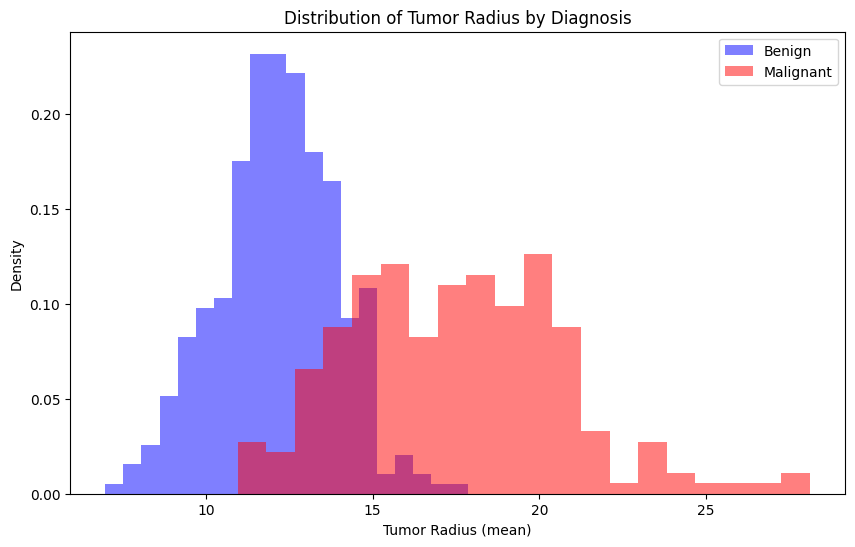

In [40]:
#Visual 1 - Distribution of Tumor Radius

plt.figure(figsize=(10, 6))
plt.hist(dataV2[dataV2['diagnosis'] == 'B']['radius_mean'], bins=20, alpha=0.5, label='Benign', color='blue', density=True)

# Plotting histogram for malignant tumors
plt.hist(dataV2[dataV2['diagnosis'] == 'M']['radius_mean'], bins=20, alpha=0.5, label='Malignant', color='red', density=True)

plt.title('Distribution of Tumor Radius by Diagnosis')
plt.xlabel('Tumor Radius (mean)')
plt.ylabel('Density')
plt.legend()
plt.show()

*Answer to research question:* This histogram shows the distribution of mean tumor radius for benign and malignant tumors. It helps us visualize how tumor radius differs between the two diagnoses.

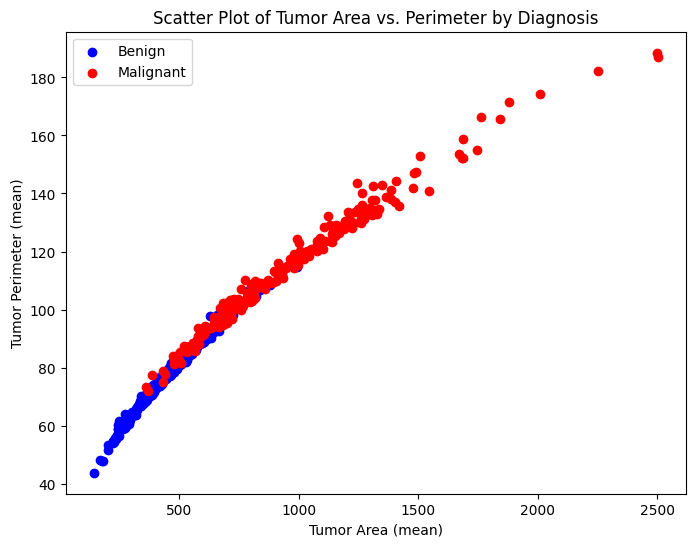

In [41]:
#Visual 2 - Scatter Plot of Area vs. Perimeter

plt.figure(figsize=(8, 6))
plt.scatter(dataV2[dataV2['diagnosis'] == 'B']['area-mean'], dataV2[dataV2['diagnosis'] == 'B']['perimeter-mean'], label='Benign', color='blue')

# Scatter plot for malignant tumors
plt.scatter(dataV2[dataV2['diagnosis'] == 'M']['area-mean'], dataV2[dataV2['diagnosis'] == 'M']['perimeter-mean'], label='Malignant', color='red')

plt.title('Scatter Plot of Tumor Area vs. Perimeter by Diagnosis')
plt.xlabel('Tumor Area (mean)')
plt.ylabel('Tumor Perimeter (mean)')
plt.legend()
plt.show()

*Answer to research question:* This scatter plot helps us visualize the relationship between tumor area and perimeter, colored by diagnosis (benign or malignant). It can reveal any patterns or clusters that differentiate the two classes.

### **5.2:** Reflection


If i had time i would have looked for two dataset that are simillar and made the cleaning for both of them and tried to combine the two different dataset, with the complexity that they dont have the same records length.

I would have done as well some memory optimization, since the columns are using big data types and can be shrinked.